In [1]:
import mysql.connector 
import numpy as np
import pandas as pd
import config_final
import requests
from utilities import query, query_list


from sodapy import Socrata
import sqlalchemy as db

**Connect to Database**

In [2]:
def query(q):
    try:
        return pd.read_sql_query(q, engine)
    # Pass when no data is returned    
    except ResourceClosedError:
        pass

def query_list(col, table, distinct = True):
    elts = ['SELECT',
            'DISTINCT' if distinct else '',
            col,
            'FROM',
            table]
    query_str = ' '.join(elts)
    df = query(query_str)
    l = df.iloc[:,0].tolist()
    return l

In [3]:
engine = db.create_engine(f'mysql+mysqlconnector://{config_final.user}:{config_final.password}@{config_final.host}/con_bills')

connection = engine.connect()
metadata=db.MetaData()

In [4]:
df = query('SELECT * FROM con_bills.current_bills')


**Review All data**

In [5]:
df.head()

,BillID,BillType,Chamber,Cong,Cosponsr,IntrDate,Mult,PLaw,Title,Veto,...,PassH,PassS,PLawDate,PLawNum,ImpBill,Majority,Major,Minor,URL,Summary
0,109-S-1000,s,1,109,0.0,2005-05-11 00:00:00,0,0,A bill to amend the Public Health Service Act ...,0,...,0,0,None,0,1,0,3.0,325.0,https://www.congress.gov/bill/109th-congress/s...,Palliative Care Training Act - Amends the Publ...
1,109-S-1001,s,1,109,0.0,2005-05-11 00:00:00,0,0,A bill to establish hospice demonstration proj...,0,...,0,0,None,0,1,0,3.0,334.0,https://www.congress.gov/bill/109th-congress/s...,Medicare Hospice Demonstration Act of 2005 - D...
2,109-S-1002,s,1,109,23.0,2005-05-11 00:00:00,0,0,A bill to amend title XVIII of the Social Secu...,0,...,0,0,None,0,1,1,3.0,322.0,https://www.congress.gov/bill/109th-congress/s...,Hospital Fair Competition Act of 2005 - Amends...
3,109-S-1003,s,1,109,0.0,2005-05-11 00:00:00,1,0,"A bill to amend the Act of December 22, 1974, ...",0,...,0,1,None,0,1,1,20.0,2012.0,https://www.congress.gov/bill/109th-congress/s...,Navajo-Hopi Land Settlement Amendments of 2005...
4,109-S-1004,s,1,109,5.0,2005-05-11 00:00:00,0,0,A bill to provide the Federal Trade Commission...,0,...,0,0,None,0,1,1,17.0,1709.0,https://www.congress.gov/bill/109th-congress/s...,Enhanced Consumer Protection Against Spyware A...


In [6]:
df.shape

(54707, 29)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54707 entries, 0 to 54706
Data columns (total 29 columns):
BillID      54707 non-null object
BillType    54707 non-null object
Chamber     54707 non-null int64
Cong        54707 non-null int64
Cosponsr    54707 non-null float64
IntrDate    54664 non-null object
Mult        54707 non-null int64
PLaw        54707 non-null int64
Title       54707 non-null object
Veto        54707 non-null int64
Class       54707 non-null float64
District    54707 non-null float64
FrstConH    54707 non-null float64
FrstConS    54707 non-null float64
Gender      54707 non-null int64
MRef        54707 non-null int64
NameFull    54707 non-null object
Party       54707 non-null float64
Postal      54707 non-null object
PassH       54707 non-null int64
PassS       54707 non-null int64
PLawDate    1506 non-null object
PLawNum     54707 non-null object
ImpBill     54707 non-null int64
Majority    54707 non-null int64
Major       54707 non-null float64
Minor       

In [35]:
df['Cong'].value_counts()

110    11081
111    10629
112    10436
114    10055
113     8866
109     3640
Name: Cong, dtype: int64

In [7]:
df['PassH'].value_counts()

0    50566
1     4141
Name: PassH, dtype: int64

In [8]:
df['Cong'].value_counts()

110    11081
111    10629
112    10436
114    10055
113     8866
109     3640
Name: Cong, dtype: int64

In [9]:
df['BillType'].value_counts()

hr    33016
s     21691
Name: BillType, dtype: int64

**General Visualizations:**

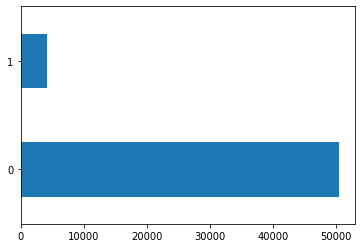

In [13]:
df['PassH'].value_counts().plot.barh()

Text(0.5, 1.0, 'Number of Bills by Recent Congress')

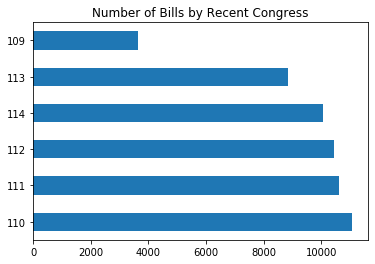

In [12]:
df['Cong'].value_counts(sort=True).plot.barh().set_title('Number of Bills by Recent Congress')


Text(0.5, 1.0, 'Majority vs Minority House Bill Proposals')

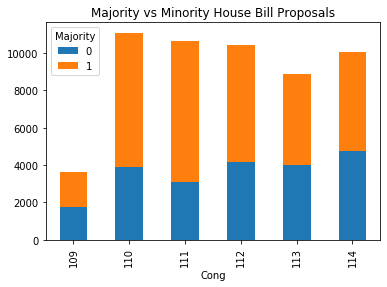

In [27]:
#Bills Proposed by Majority or Not, for all Congresses

df.groupby(['Cong', 'Majority']).size().unstack().plot.bar(stacked=True).set_title('Majority vs Minority House Bill Proposals')


Text(0.5, 1.0, 'Bill Passage per Congress')

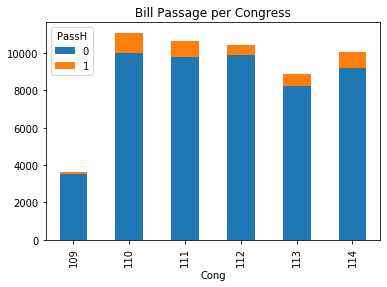

In [24]:
#Portion of bills proposed for all congresses vs those that passed the house 
df.groupby(['Cong', 'PassH']).size().unstack().plot.bar(stacked=True).set_title('Bill Passage per Congress')


Text(0.5, 1.0, 'Bill Proposal by Gender')

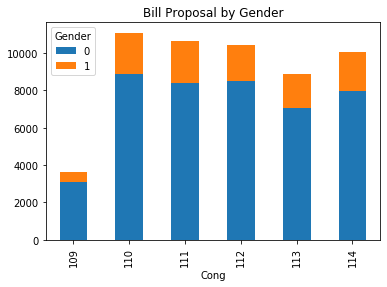

In [29]:
df.groupby(['Cong', 'Gender']).size().unstack().plot.bar(stacked=True).set_title('Bill Proposal by Gender')


Text(0.5, 1.0, 'Bill Passage by Majority')

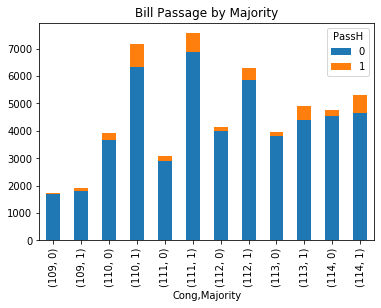

In [33]:
df.groupby(['Cong', 'Majority', 'PassH']).size().unstack().plot.bar(stacked=True).set_title('Bill Passage by Majority')


Text(0.5, 1.0, 'Bill Proposal by Party')

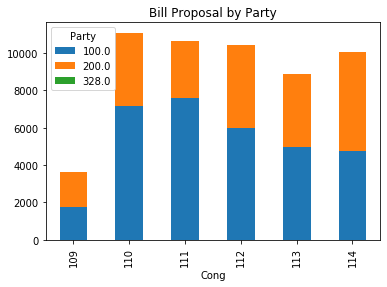

In [42]:
df.groupby(['Cong', 'Party']).size().unstack().plot.bar(stacked=True).set_title('Bill Proposal by Party')


Text(0.5, 1.0, 'Party breakdown by Congress')

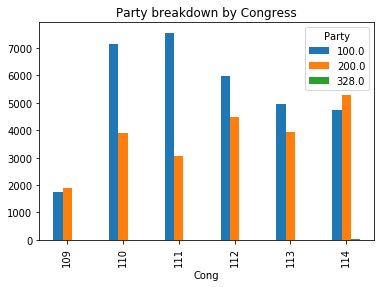

In [46]:
df.groupby(['Cong', 'Party']).size().unstack().plot.bar().set_title('Party breakdown by Congress')

**Feature Engineering**